<a href="https://colab.research.google.com/github/Palakds/Palakds/blob/main/Pandas_lec_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [73]:
import numpy as np
import pandas as pd


## Series and lists

In [74]:
#string
county = ['India','Pakistan','USA','Nepal','srilanka']
pd.Series(county)   #number against item is called index of the number

0       India
1    Pakistan
2         USA
3       Nepal
4    srilanka
dtype: object

In [75]:
#integer
runs = [13,24,56,78,100]
runs_series=pd.Series(runs)

In [76]:
#custom index
marks = [67,57,89,100]
subjects = ['maths','english','science','hindi']
pd.Series(marks,index=subjects)

maths       67
english     57
science     89
hindi      100
dtype: int64

In [77]:
# Setting a name
marks=pd.Series(marks,index=subjects,name="Palak's marks")
marks

maths       67
english     57
science     89
hindi      100
Name: Palak's marks, dtype: int64

## Series from dict

In [78]:
marks={
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
    }
marks_series=pd.Series(marks,name='palak ke marks')
marks_series

maths       67
english     57
science     89
hindi      100
Name: palak ke marks, dtype: int64

## Series attributes

In [79]:
# size (how many items are there in your series)
marks_series.size

4

In [80]:
#dtype
marks_series.dtype

dtype('int64')

In [81]:
#name
marks_series.name

'palak ke marks'

In [82]:
# is_unique
marks_series.is_unique
pd.Series([1,1,2,3,4,4,5]).is_unique

False

In [83]:
# index
marks_series.index  #gives the index object

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [84]:
type(runs_series.index)

pandas.core.indexes.range.RangeIndex

In [85]:
# values
marks_series.values

array([ 67,  57,  89, 100])

## Series using read_csv

In [86]:
# with one col
pd.read_csv('/content/subs.csv')

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [87]:
type(pd.read_csv('/content/subs.csv'))

pandas.core.frame.DataFrame

In [88]:
subs = pd.read_csv('/content/subs.csv')
subs
subs_s=subs.squeeze('columns')
subs_s


0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [114]:
# with 2 cols
vk=pd.read_csv('/content/kohli_ipl.csv',index_col='match_no')
vk
vk_s=vk.squeeze('columns')
vk_s

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [92]:
movies=pd.read_csv('/content/bollywood.csv',index_col='movie')
movies
bollywood_s=movies.squeeze('columns')
bollywood_s

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

## Series methods

In [93]:
#head and tail
subs_s.head()  #by default top 4 rows


0    48
1    57
2    40
3    43
4    44
Name: Subscribers gained, dtype: int64

In [94]:
vk_s.head(3)

match_no
1     1
2    23
3    13
Name: runs, dtype: int64

In [96]:
vk_s.tail()  #last 5

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [98]:
#sample
bollywood_s.sample()  #randomly selected

movie
Padmaavat    Deepika Padukone
Name: lead, dtype: object

In [99]:
vk_s.sample(10)

match_no
133     28
214     25
40      12
100     13
123    108
183      8
96      27
22      38
119     80
11      10
Name: runs, dtype: int64

In [102]:
# value_counts ->movies
movies
bollywood_s.value_counts()

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

In [108]:
# sort_values --> inplace   (no permanent changes)
vk_s.sort_values()
vk_s.sort_values(ascending=False).head(1).values[0]

113

In [113]:
vk_s = vk_s.copy()   # Create a copy of the Series
vk_s.sort_values(inplace=True)   # Sort the copy in-place
vk_s    #permanent changes

match_no
87       0
211      0
207      0
206      0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

In [109]:
#sort_index -> inplace -->movies
bollywood_s.sort_index()

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

## Series maths method

In [115]:
#count
vk_s.count()  #total number of rows equal total no. of matches

215

In [118]:
# sum & product
subs_s.sum()
# subs_s.product()

49510

In [119]:
# mean, median , mode, std,var
subs_s.mean()

135.64383561643837

In [120]:
subs_s.median()

123.0

In [121]:
vk_s.std()

26.22980132830278

In [122]:
bollywood_s.mode()

0    Akshay Kumar
Name: lead, dtype: object

In [123]:
#min /max
subs_s.max()

396

In [124]:
#describe (provides summary)
vk_s.describe()

count    215.000000
mean      30.855814
std       26.229801
min        0.000000
25%        9.000000
50%       24.000000
75%       48.000000
max      113.000000
Name: runs, dtype: float64

In [125]:
subs_s.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

## Series indexing

In [127]:
# integer indexing
x = pd.Series([12,14,13,35,46,57,58,79,9])
x[0]

12

In [128]:
#negative indexing won't work
x[-1]

KeyError: -1

In [129]:
bollywood_s

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [131]:
bollywood_s[0]

'Vicky Kaushal'

In [132]:
bollywood_s[-1]   #if string will work

'Akshay Kumar'

In [133]:
vk_s[0]

KeyError: 0

In [134]:
marks_series

maths       67
english     57
science     89
hindi      100
Name: palak ke marks, dtype: int64

In [135]:
marks_series[-1]

100

In [136]:
# slicing
vk_s

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [137]:
vk_s[5:16]

match_no
6      9
7     34
8      0
9     21
10     3
11    10
12    38
13     3
14    11
15    50
16     2
Name: runs, dtype: int64

In [138]:
#negative slicing
vk_s[-5:]

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [139]:
bollywood_s[-5:]

movie
Hum Tumhare Hain Sanam      Shah Rukh Khan
Aankhen (2002 film)       Amitabh Bachchan
Saathiya (film)               Vivek Oberoi
Company (film)                  Ajay Devgn
Awara Paagal Deewana          Akshay Kumar
Name: lead, dtype: object

In [140]:
#fancy indexing
vk_s[[1,3,4,5]]

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int64

In [141]:
bollywood_s

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [144]:
#indexing with labels -> fancy indexing
print(bollywood_s['Aankhen (2002 film)'])

Amitabh Bachchan


## Editing series

In [145]:
#using indexing
marks_series

maths       67
english     57
science     89
hindi      100
Name: palak ke marks, dtype: int64

In [149]:
marks_series[1]=100
marks_series

maths       67
english    100
science     89
hindi      100
Name: palak ke marks, dtype: int64

In [153]:
# what if an index does not exist
marks_series['sst']=90
marks_series

maths       67
english    100
science     89
hindi      100
sst         90
Name: palak ke marks, dtype: int64

In [158]:
#slicing
runs_series[2:4]=[100,100]
runs_series

0     13
1     24
2    100
3    100
4    100
dtype: int64

In [159]:
#fancy indexing
runs_series[[0,3,4]]=[0,0,0]
runs_series

0      0
1     24
2    100
3      0
4      0
dtype: int64

In [162]:
#using index label
bollywood_s['Aankhen (2002 film)']='Alia Bhat'
bollywood_s

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                            Alia Bhat
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

## Series with Python Functionalities

In [163]:
#len/type/dir/sorted/max/min
print(len(subs_s))

365


In [164]:
print(type(subs_s))

<class 'pandas.core.series.Series'>


In [165]:
print(dir(subs_s))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror_

In [168]:
print(sorted(subs_s))    #output in the list

[33, 33, 35, 37, 39, 40, 40, 40, 40, 42, 42, 43, 44, 44, 44, 45, 46, 46, 48, 49, 49, 49, 49, 50, 50, 50, 51, 54, 56, 56, 56, 56, 57, 61, 62, 64, 65, 65, 66, 66, 66, 66, 67, 68, 70, 70, 70, 71, 71, 72, 72, 72, 72, 72, 73, 74, 74, 75, 76, 76, 76, 76, 77, 77, 78, 78, 78, 79, 79, 80, 80, 80, 81, 81, 82, 82, 83, 83, 83, 84, 84, 84, 85, 86, 86, 86, 87, 87, 87, 87, 88, 88, 88, 88, 88, 89, 89, 89, 90, 90, 90, 90, 91, 92, 92, 92, 93, 93, 93, 93, 95, 95, 96, 96, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 100, 101, 101, 101, 102, 102, 103, 103, 104, 104, 104, 105, 105, 105, 105, 105, 105, 105, 105, 105, 108, 108, 108, 108, 108, 108, 109, 109, 110, 110, 110, 111, 111, 112, 113, 113, 113, 114, 114, 114, 114, 115, 115, 115, 115, 117, 117, 117, 118, 118, 119, 119, 119, 119, 120, 122, 123, 123, 123, 123, 123, 124, 125, 126, 127, 128, 128, 129, 130, 131, 131, 132, 132, 134, 134, 134, 135, 135, 136, 136, 136, 137, 138, 138, 138, 139, 140, 144, 145, 146, 146, 146, 146, 147, 149, 150, 150, 150, 150, 151, 1

In [167]:
print(max(subs_s))

396


In [172]:
# type conversion
marks_series
list(marks_series)
dict(marks_series)

{'maths': 67, 'english': 100, 'science': 89, 'hindi': 100, 'sst': 90}

In [180]:
bollywood_s

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                            Alia Bhat
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [177]:
#membership operator
bollywood_s
'Saathiya (film)' in bollywood_s   #in operatyor only search in index

True

In [181]:
'Alia Bhat' in bollywood_s.values

True

In [182]:
#looping   (work on values)
for i in bollywood_s:
  print(i)

Vicky Kaushal
Vicky Ahuja
Anupam Kher
Emraan Hashmi
Mona Ambegaonkar
Geetika Vidya Ohlyan
Arshad Warsi
Radhika Apte
Kangana Ranaut
Nawazuddin Siddiqui
Ali Asgar
Ranveer Singh
Prit Kamani
Ajay Devgn
Sushant Singh Rajput
Amitabh Bachchan
Abhimanyu Dasani
Talha Arshad Reshi
Nawazuddin Siddiqui
Garima Agarwal
Rasika Agashe
Barun Sobti
Akshay Kumar
Zaheer Iqbal
Vidyut Jammwal
Deepika Amin
Manav Kaul
Naseeruddin Shah
Varun Dhawan
Shreyas Talpade
Tiger Shroff
Boman Irani
Ajay Devgn
Arjun Kapoor
Gavie Chahal
Prabhu Deva
Shahid Kapoor
Ayushmann Khurrana
Anupam Kher
Karanvir Bohra
Hrithik Roshan
Jimmy Sheirgill
John Abraham
Rishi Kapoor
Kangana Ranaut
Natalia Janoszek
Diljit Dosanjh
Sidharth Malhotra
Rajeev Khandelwal
Zaira Wasim
Akshay Kumar
Jacqueline Fernandez
Ayushmann Khurrana
Akshaye Khanna
Sonam Kapoor
Karan Deol
Sanjay Dutt
Bhavesh Kumar
Sanaya Irani
Ayushmann Khurrana
Siddhanth Kapoor
Akshay Kumar
Taapsee Pannu
Rajkummar Rao
Sunny Singh Nijjar
Neil Nitin Mukesh
Suraj Pancholi
Boman Iran

In [183]:
for i in bollywood_s.index:
  print(i)

Uri: The Surgical Strike
Battalion 609
The Accidental Prime Minister (film)
Why Cheat India
Evening Shadows
Soni (film)
Fraud Saiyaan
Bombairiya
Manikarnika: The Queen of Jhansi
Thackeray (film)
Amavas
Gully Boy
Hum Chaar
Total Dhamaal
Sonchiriya
Badla (2019 film)
Mard Ko Dard Nahi Hota
Hamid (film)
Photograph (film)
Risknamaa
Mere Pyare Prime Minister
22 Yards
Kesari (film)
Notebook (2019 film)
Junglee (2019 film)
Gone Kesh
Albert Pinto Ko Gussa Kyun Aata Hai?
The Tashkent Files
Kalank
Setters (film)
Student of the Year 2
PM Narendra Modi
De De Pyaar De
India's Most Wanted (film)
Yeh Hai India
Khamoshi (2019 film)
Kabir Singh
Article 15 (film)
One Day: Justice Delivered
Hume Tumse Pyaar Kitna
Super 30 (film)
Family of Thakurganj
Batla House
Jhootha Kahin Ka
Judgementall Hai Kya
Chicken Curry Law
Arjun Patiala
Jabariya Jodi
Pranaam
The Sky Is Pink
Mission Mangal
Saaho
Dream Girl (2019 film)
Section 375
The Zoya Factor (film)
Pal Pal Dil Ke Paas
Prassthanam
P Se Pyaar F Se Faraar
Ghost 

In [184]:
#arithmetic operators
marks_series

maths       67
english    100
science     89
hindi      100
sst         90
Name: palak ke marks, dtype: int64

In [185]:
100 - marks_series

maths      33
english     0
science    11
hindi       0
sst        10
Name: palak ke marks, dtype: int64

In [186]:
# relational operators
vk_s >= 50

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

### Boolean Indexing on Series

In [190]:
# Find no of 50's and 100's scored by kohli
vk_s[vk_s >= 50].size

50

In [196]:
# find number of ducks
vk_s == 0
vk_s[vk_s == 0].size

9

In [192]:
# Count number of day when I had more than 200 subs a day
subs_s[subs_s > 200].size

59

In [193]:
# find actors who have done more than 20 movies
num_bollywood_s = bollywood_s .value_counts()
num_bollywood_s [num_bollywood_s  > 20]

lead
Akshay Kumar        48
Amitabh Bachchan    44
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64

### Plotting Graphs on Series

<Axes: >

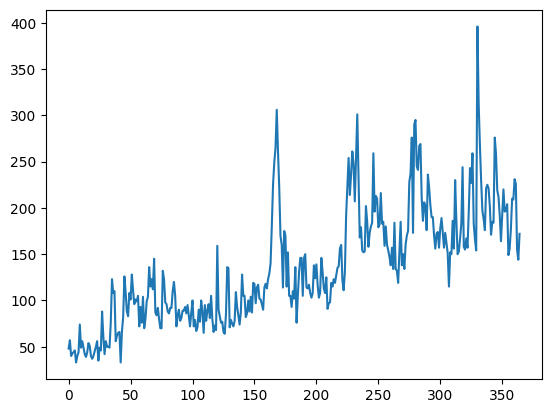

In [194]:
subs_s.plot()

<Axes: ylabel='count'>

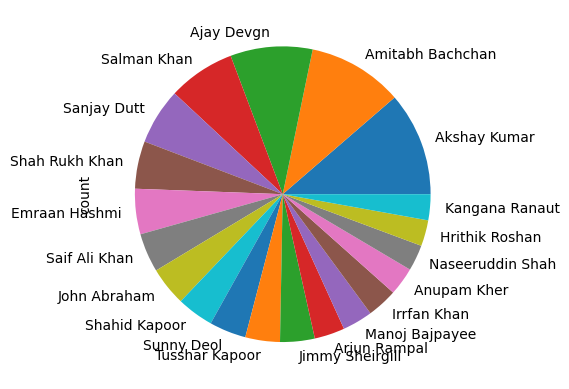

In [195]:
bollywood_s.value_counts().head(20).plot(kind='pie')